In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
# Function to plot decision boundaries
def plot_decision_boundary(weights, biases, X, Y, epoch):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + biases)
    Z = np.round(Z)
    Z = Z[:, 0] + 2*Z[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0] + 2*Y[:, 1], s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title(f'Decision Boundary after {epoch} epochs')
    plt.xlabel("X1")
    plt.ylabel("X2")

In [4]:
# Data
X = np.array([
    [0.1, 0.7, 0.8, 0.8, 1.0, 0.3, 0.0, -0.3, -0.5, -1.5],
    [1.2, 1.8, 1.6, 0.6, 0.8, 0.5, 0.2, 0.8, -1.5, -1.3]
]).T
Y = np.array([
    [1, 1, 1, 0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
]).T

In [6]:
# Initialize weights and biases
input_size = 2
output_size = 2
weights = np.random.rand(input_size, output_size) - 0.5
biases = np.random.rand(1, output_size) - 0.5

# Training parameters
learning_rate = 0.1

In [7]:
# Lists to store errors and weights/biases for specific epochs
errors_3, errors_10, errors_100 = [], [], []
weights_3, biases_3, weights_10, biases_10, weights_100, biases_100 = None, None, None, None, None, None


In [8]:
for epoch in range(100):
    z = np.dot(X, weights) + biases
    output = sigmoid(z)
    error = Y - output
    
    if epoch < 3:
        errors_3.append(np.mean(np.abs(error)))
    if epoch < 10:
        errors_10.append(np.mean(np.abs(error)))
    errors_100.append(np.mean(np.abs(error)))
    
    d_output = error * sigmoid_derivative(output)
    weights += learning_rate * np.dot(X.T, d_output)
    biases += learning_rate * np.sum(d_output, axis=0)
    
    if epoch == 2:
        weights_3, biases_3 = weights.copy(), biases.copy()
    elif epoch == 9:
        weights_10, biases_10 = weights.copy(), biases.copy()
    elif epoch == 99:
        weights_100, biases_100 = weights.copy(), biases.copy()


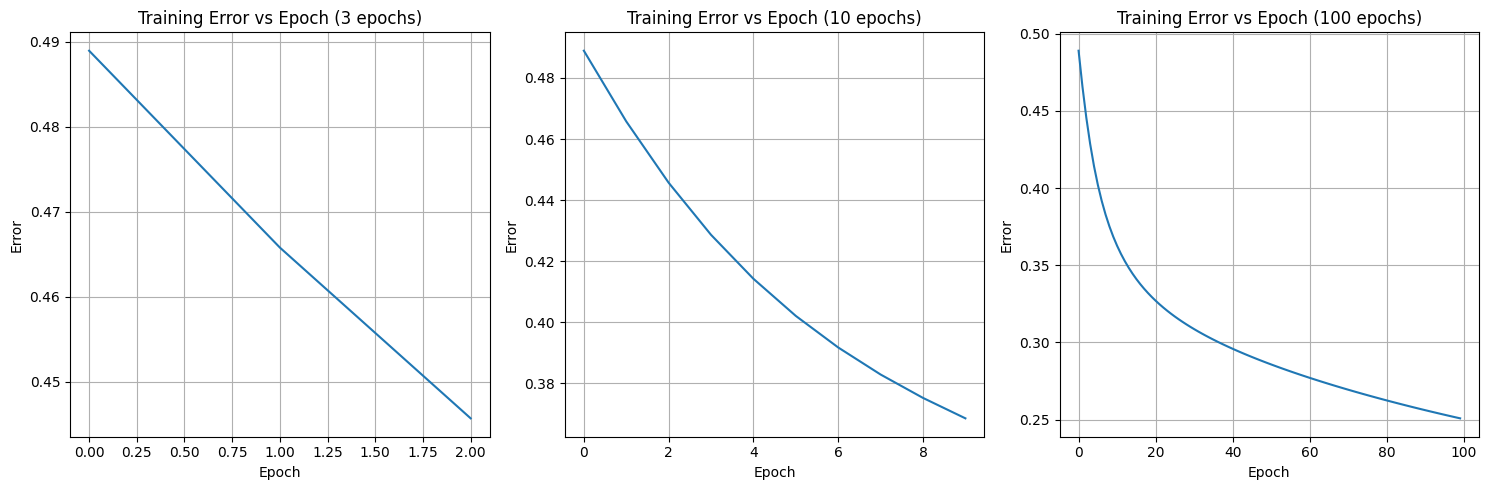

In [15]:
# Plotting errors
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(errors_3)
plt.title("Training Error vs Epoch (3 epochs)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(errors_10)
plt.title("Training Error vs Epoch (10 epochs)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(errors_100)
plt.title("Training Error vs Epoch (100 epochs)")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)

plt.tight_layout()
plt.savefig('error_vs_epoch_1.svg', format='svg')
plt.show()


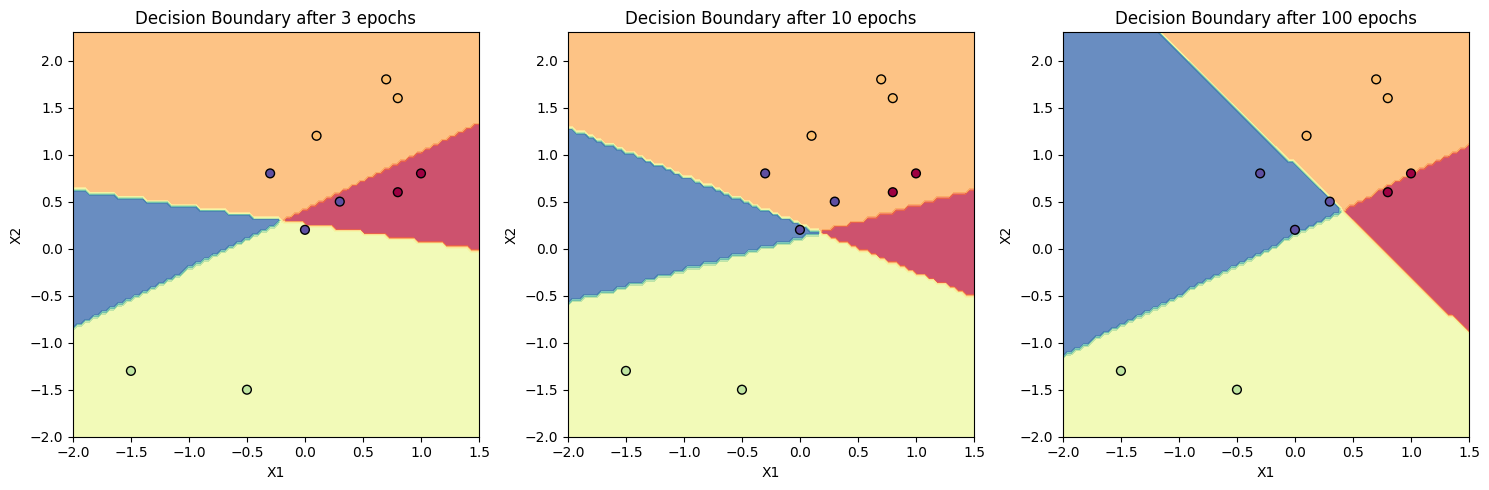

In [16]:
# Plotting decision boundaries
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_decision_boundary(weights_3, biases_3, X, Y, 3)
plt.subplot(1, 3, 2)
plot_decision_boundary(weights_10, biases_10, X, Y, 10)
plt.subplot(1, 3, 3)
plot_decision_boundary(weights_100, biases_100, X, Y, 100)

plt.tight_layout()
plt.savefig('decision_1.svg', format='svg')
plt.show()
